In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

In [2]:
#랜덤 데이터 생성
np.random.seed(42)
group1 = np.random.normal(loc=6, scale = 1.5, size=100)
group2 = np.random.normal(loc=7, scale = 1.5, size=100)

#csv 저장
data = pd.DataFrame({
    'group1' : group1,
    'group2' : group2
})

data.to_csv('./data/sleep_data.csv', index=False, encoding='utf-8')

In [3]:
#csv 읽기
sleep_data = pd.read_csv('./data/sleep_data.csv')
print(sleep_data)

      group1    group2
0   6.745071  4.876944
1   5.792604  6.369032
2   6.971533  6.485928
3   8.284545  5.796584
4   5.648770  6.758071
..       ...       ...
95  3.804728  7.577976
96  6.444180  5.674214
97  6.391583  7.230588
98  6.007670  7.087313
99  5.648119  5.285545

[100 rows x 2 columns]


In [6]:
group1_data = sleep_data['group1']
group2_data = sleep_data['group2']

In [8]:
#앤-휘트니 검정 수행
st, p_val = mannwhitneyu(group1_data, group2_data, alternative='two-sided') #two-sided는 양측검증
print(st, p_val)

2834.0 1.2154388166891524e-07


In [9]:
#유의수준 0.05로 가설 점정
if p_val < 0.05 :
    print('두 집단 간에는 유익한 차이가 있음')
else :
    print('두 집단 간에는 유의한ㄴ 차이가 없음')

두 집단 간에는 유익한 차이가 있음


In [13]:
#크러스칼-왈라스 검증 실습

from scipy.stats import kruskal

np.random.seed(1)
group1 = np.random.normal(loc=5, scale=1, size=20)
group2 = np.random.normal(loc=7, scale=1, size=20)
group3 = np.random.normal(loc=10, scale=1, size=20)

print(group1, group2, group3)

[6.62434536 4.38824359 4.47182825 3.92703138 5.86540763 2.6984613
 6.74481176 4.2387931  5.3190391  4.75062962 6.46210794 2.93985929
 4.6775828  4.61594565 6.13376944 3.90010873 4.82757179 4.12214158
 5.04221375 5.58281521] [5.89938082 8.14472371 7.90159072 7.50249434 7.90085595 6.31627214
 6.87710977 6.06423057 6.73211192 7.53035547 6.30833925 6.60324647
 6.3128273  6.15479436 6.32875387 6.9873354  5.88268965 7.2344157
 8.65980218 7.74204416] [ 9.80816445  9.11237104  9.25284171 11.6924546  10.05080775  9.36300435
 10.19091548 12.10025514 10.12015895 10.61720311 10.30017032  9.64775015
  8.8574818   9.65065728  9.79110577 10.58662319 10.83898341 10.93110208
 10.28558733 10.88514116]


In [14]:
H, p_val = kruskal(group1, group2, group3)

print("H 검정 통계량 : ", H)
print("p-val : ", p_val)

H 검정 통계량 :  48.81967213114754
p-val :  2.5057797345031748e-11


In [21]:
#프리드만 검증 실습

import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare

In [22]:
# 데이터 생성
np.random.seed(1)
group1 = np.random.normal(loc=10, scale=2, size=10)
group2 = np.random.normal(loc=12, scale=2, size=10)
group3 = np.random.normal(loc=15, scale=2, size=10)
data = np.stack([group1, group2, group3], axis=1)

In [23]:
# 프리드만 검정 수행
statistic, pvalue = friedmanchisquare(*data.T)
#*data.T는 전치가 이루어진 배열을 반환(행과 열을 바꿔준다 )
#*data.T는 전치된 배열의 각 행을 개별적인 인자로 언패킹하는 것을 의미
print("프리드만 검정 결과")
print(f"검정 통계량: {statistic}")
print(f"p-value: {pvalue}")

프리드만 검정 결과
검정 통계량: 11.400000000000006
p-value: 0.003345965457471265


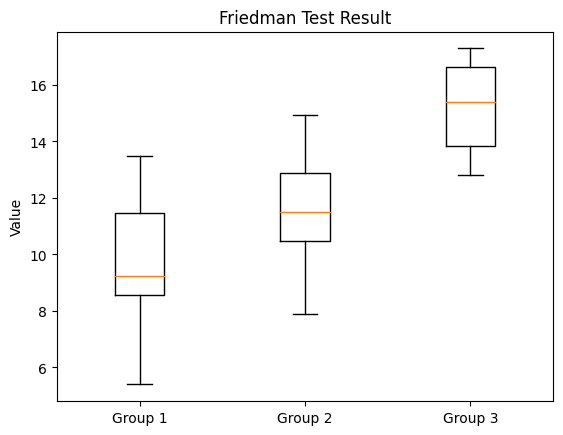

In [24]:
# 박스플롯으로 시각화
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Group 1', 'Group 2', 'Group 3'])
ax.set_ylabel('Value')
ax.set_title('Friedman Test Result')
plt.show()